In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_data(filename):
    try:
        loaded_df_with_index = pd.read_csv("../../Dataset_files/single_cell_RNA_seq_data/" + filename + ".csv", index_col=0)
        loaded_matrix = loaded_df_with_index.values
        loaded_index = loaded_df_with_index.index
        print("Successfully loaded '" + filename + "'.csv' with row names as index.")
        print("Shape of loaded matrix:", loaded_matrix.shape)
        print("First 5 rows of the index:", loaded_index[:5].tolist())
        print("First 5 columns of the matrix:\n", loaded_matrix[:5, :5])
        return loaded_matrix, loaded_index
    except FileNotFoundError:
        print("Error: '" + filename + "' not found.")


In [3]:
pca_data, data_index = load_data("sct_pca_embeddings")

Successfully loaded 'sct_pca_embeddings'.csv' with row names as index.
Shape of loaded matrix: (11505, 50)
First 5 rows of the index: ['sample1_AAACCCATCGATCCAA-1', 'sample1_AAACCCATCGGTCTAA-1', 'sample1_AAACCCATCTTTCCGG-1', 'sample1_AAACGAAAGCGACTGA-1', 'sample1_AAACGAAAGTAAACTG-1']
First 5 columns of the matrix:
 [[ 28.77201431  -4.9061265    9.19699071   4.38563945  12.59065004]
 [ 28.65983222 -12.82542439  -2.17624735  20.34897321  -4.65590979]
 [ 55.84140878  13.652834   -16.46518717   3.57643492  -2.65998527]
 [ 32.25849933  13.51903017  -8.81719705  12.71265535 -12.52686845]
 [ 31.11154598   5.42460221 -10.03139599  10.69345789   1.97892845]]


In [4]:
umap_data, _ = load_data("sct_umap_embeddings")

Successfully loaded 'sct_umap_embeddings'.csv' with row names as index.
Shape of loaded matrix: (11505, 2)
First 5 rows of the index: ['sample1_AAACCCATCGATCCAA-1', 'sample1_AAACCCATCGGTCTAA-1', 'sample1_AAACCCATCTTTCCGG-1', 'sample1_AAACGAAAGCGACTGA-1', 'sample1_AAACGAAAGTAAACTG-1']
First 5 columns of the matrix:
 [[ 9.54781791 -0.72914434]
 [ 7.4985387  -0.20724017]
 [ 7.65226862  0.75808963]
 [ 7.20123121  0.44186228]
 [ 6.54967615  2.11137008]]


In [5]:
tsne_data, _ = load_data("sct_tsne_embeddings")

Successfully loaded 'sct_tsne_embeddings'.csv' with row names as index.
Shape of loaded matrix: (11505, 2)
First 5 rows of the index: ['sample1_AAACCCATCGATCCAA-1', 'sample1_AAACCCATCGGTCTAA-1', 'sample1_AAACCCATCTTTCCGG-1', 'sample1_AAACGAAAGCGACTGA-1', 'sample1_AAACGAAAGTAAACTG-1']
First 5 columns of the matrix:
 [[ -2.92781956 -34.67567546]
 [ -8.93185232 -41.82922303]
 [  7.12551297 -29.76151702]
 [  4.25403131 -30.95119472]
 [ -7.24447254 -19.87410289]]


In [4]:
cluster_labels, _ = load_data("sct_cluster_labels")
cluster_labels = cluster_labels.flatten()
cluster_labels

Successfully loaded 'sct_cluster_labels'.csv' with row names as index.
Shape of loaded matrix: (11505, 1)
First 5 rows of the index: ['sample1_AAACCCATCGATCCAA-1', 'sample1_AAACCCATCGGTCTAA-1', 'sample1_AAACCCATCTTTCCGG-1', 'sample1_AAACGAAAGCGACTGA-1', 'sample1_AAACGAAAGTAAACTG-1']
First 5 columns of the matrix:
 [[2]
 [2]
 [2]
 [2]
 [3]]


array([2, 2, 2, ..., 5, 0, 4])

In [7]:
# import h5py
# with h5py.File("test.h5ad", 'r') as f:
#     print(f.keys())
#     if 'X' in f:
#         print("Shape of X:", f['X'].shape)
#     if 'var' in f:
#         for key in f['var'].keys():
#             if isinstance(f['var'][key], h5py.Dataset):
#                 print(f"Shape of var/{key}:", f['var'][key].shape)
#             else:
#                 print(f"Keys in var/{key}:", list(f['var'][key].keys()))

In [5]:
import sys
import os
# current_dir = os.path.dirname(os.path.abspath(__file__))
current_working_dir = os.getcwd()
parent_parent_dir = os.path.dirname(os.path.dirname(current_working_dir))
sys.path.append(parent_parent_dir)

In [6]:
from time import time
from isumap import isumap
from data_and_plots import plot_data, printtime, createNonUniformHemisphere #, createMammoth, load_MNIST, createSwissRole, createFourGaussians, createMoons, createTorus, load_FashionMNIST
from multiprocessing import cpu_count
import numpy as np

In [7]:
k = 15
d = 2
N = pca_data.shape[0]
normalize = True
metricMDS = True
distBeyondNN = False
tconorm = "probabilistic sum"
epm = False
distFun = "canonical"
pca_dim = 50
path = "./../results/single_cell_RNA_seq_experiments"

In [8]:
data = pca_data[:,0:pca_dim]
labels = cluster_labels

print("data.shape: ", data.shape)
print("labels.shape: ", labels.shape)

data.shape:  (11505, 50)
labels.shape:  (11505,)


Number of CPU threads =  8

Nearest neighbours computed in: 0.28 sec

Normalization computed in: 2.76 sec
Computing the graph...
Applying t-conorm...

Running Dijkstra...

Dijkstra: 2.30 min

Extracted connected components in: 1.72 sec
Number of clusters = 1

Mean points and labels: 0.00 sec

Euclidean distances: 1.82 sec

Performing classical MDS...

classical MDS: 3.63 sec

Embedded the cluster mean points in: 3.63 sec

Reducing dimension...

Performing classical MDS...

classical MDS: 15.45 sec

Performing metric MDS...


100%|██████████| 300/300 [01:52<00:00,  2.68it/s]


A plot of the loss over epochs was stored in ./Loss_graphs/N_11505_total_loss.png


Computed submatrix embeddings in: 2.14 min


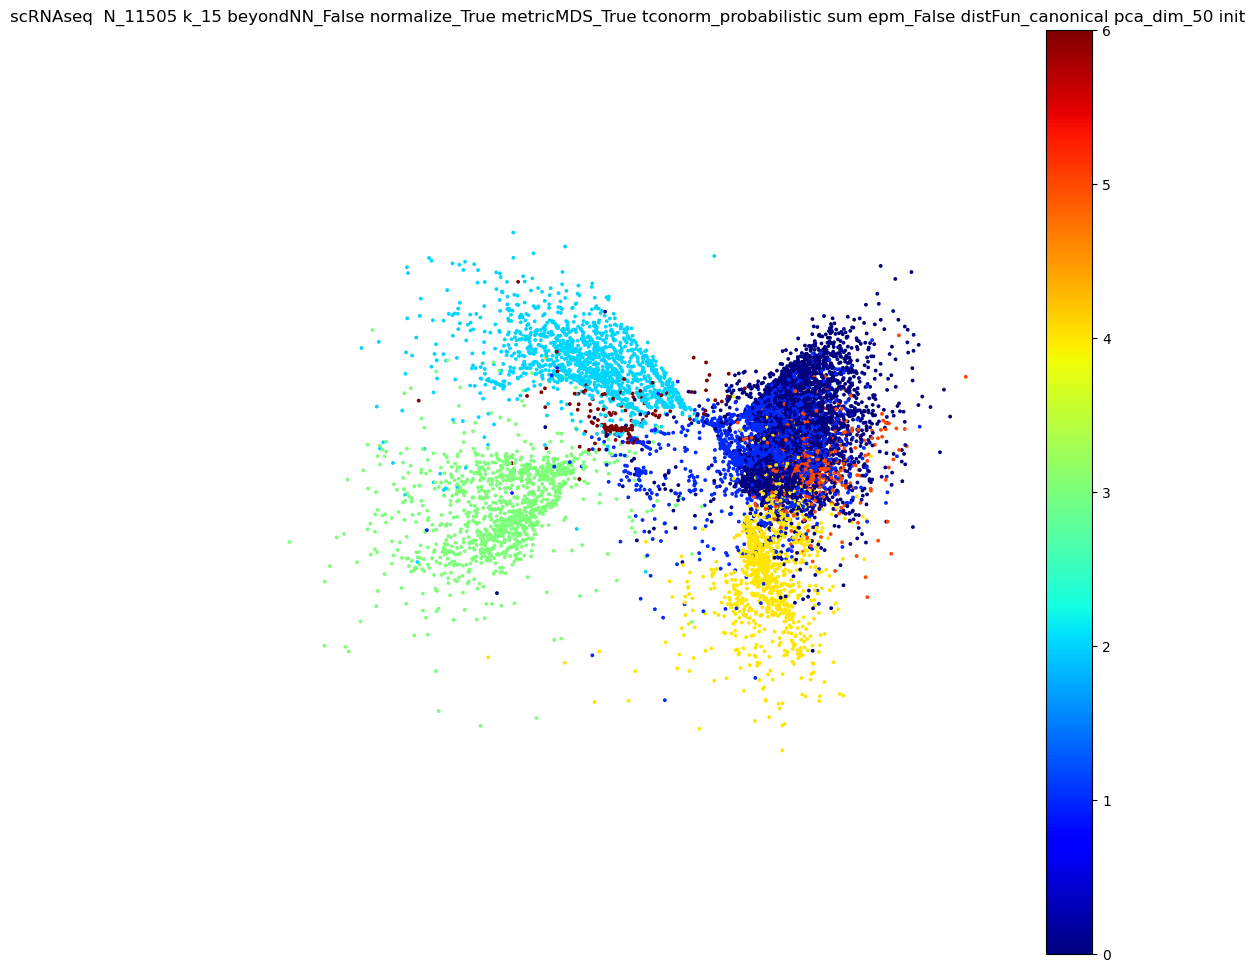

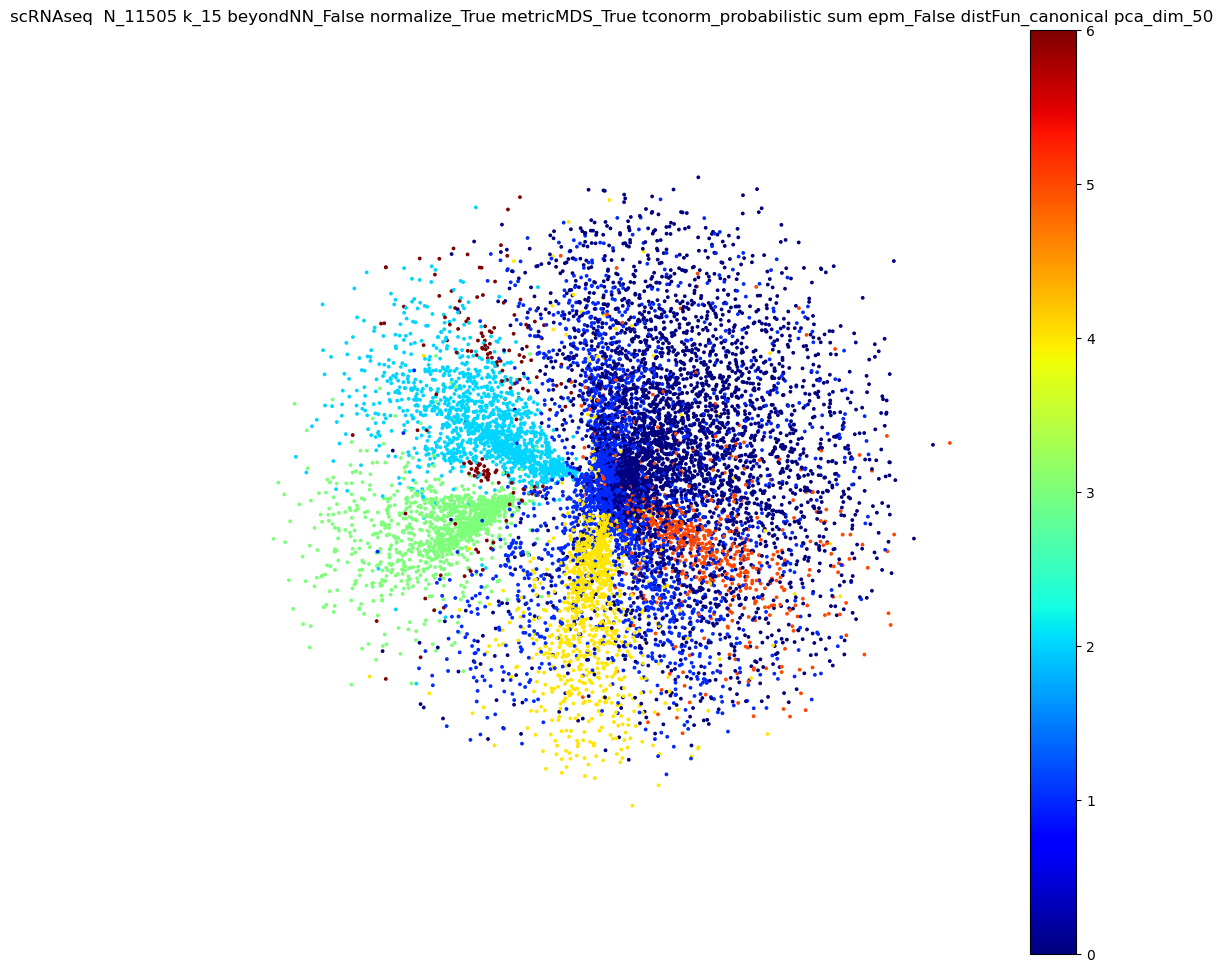


Result saved in './Results/scRNAseq  N_11505 k_15 beyondNN_False normalize_True metricMDS_True tconorm_probabilistic sum epm_False distFun_canonical pca_dim_50.png'

Isumap total time: 4.83 min


In [9]:
if __name__ == '__main__':

    title = "scRNAseq  N_" + str(N) + " k_" + str(k) + " beyondNN_" + str(distBeyondNN) + " normalize_" + str(normalize) + " metricMDS_" + str(metricMDS) + " tconorm_" + tconorm + " epm_" + str(epm) + " distFun_" + distFun + " pca_dim_" + str(pca_dim)


    t0=time()
    finalInitEmbedding, finalEmbedding, clusterLabels = isumap(data, k, d,
        normalize = normalize, distBeyondNN=distBeyondNN, verbose=True, saveDistMatrix = False, initialization="cMDS", metricMDS=metricMDS, sgd_saveloss=True, tconorm = tconorm, epm=epm, distFun=distFun, sgd_n_epochs=300)
    t1 = time()
    
    plot_data(finalInitEmbedding,labels,title=title+" init",display=True, save=True, colorbar=True, path=path)
    plot_data(finalEmbedding,labels,title=title,display=True, save=True, colorbar=True, path=path)
    print("\nResult saved in './Results/" + title + ".png'")
    
    printtime("Isumap total time",t1-t0)

    

In [11]:
np.unique(clusterLabels)

array([0.])

In [10]:
finalEmbedding.shape

(11505, 2)

In [11]:
import csv
import numpy as np

def save_numpy_array_to_csv(array, filename):
  try:
    with open(filename, 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      if array.ndim == 1:
        # Write a 1D array as a single column
        for item in array:
          writer.writerow([item])
      elif array.ndim == 2:
        # Write a 2D array row by row
        writer.writerows(array)
      else:
        print(f"Warning: Array with {array.ndim} dimensions is not directly supported for CSV writing. Flattening the array.")
        # Flatten higher-dimensional arrays and save as a single column
        for item in array.flatten():
          writer.writerow([item])
    print(f"NumPy array successfully saved to '{filename}'")
  except Exception as e:
    print(f"Error saving array to CSV: {e}")

# # Example usage:
# # 1D NumPy array
# my_array_1d = np.array([10, 20, 30, 40, 50])
# save_numpy_array_to_csv(my_array_1d, 'my_data_1d.csv')

# # 2D NumPy array
# my_array_2d = np.array([[1, 2, 3],
#                         [4, 5, 6],
#                         [7, 8, 9]])
# save_numpy_array_to_csv(my_array_2d, 'my_data_2d.csv')

# # Higher-dimensional NumPy array (will be flattened)
# my_array_3d = np.array([[[1, 2], [3, 4]],
#                         [[5, 6], [7, 8]]])
# save_numpy_array_to_csv(my_array_3d, 'my_data_3d.csv')

save_numpy_array_to_csv(finalEmbedding, title + '.csv')

NumPy array successfully saved to 'scRNAseq  N_11505 k_15 beyondNN_False normalize_True metricMDS_True tconorm_probabilistic sum epm_False distFun_canonical pca_dim_50.csv'


In [15]:
save_numpy_array_to_csv(labels, 'label_colors.csv')

NumPy array successfully saved to 'label_colors.csv'


In [12]:
import csv
import numpy as np

def read_csv_to_numpy_array(filename):
  """Reads data from a CSV file and returns it as a NumPy array.

  Args:
    filename: The name of the CSV file to read (e.g., 'data.csv').

  Returns:
    A NumPy array containing the data from the CSV file, or None if an error occurs.
  """
  try:
    data = []
    with open(filename, 'r', newline='') as csvfile:
      reader = csv.reader(csvfile)
      for row in reader:
        # Attempt to convert each element in the row to a float
        # If it fails, keep it as a string
        converted_row = []
        for item in row:
          try:
            converted_row.append(float(item))
          except ValueError:
            converted_row.append(item)
        data.append(converted_row)

    # Determine if all elements can be consistently converted to numbers
    all_numeric = True
    for row in data:
      for item in row:
        if not isinstance(item, (int, float)):
          all_numeric = False
          break
      if not all_numeric:
        break

    if all_numeric and data:
      return np.array(data)
    elif data:
      # If not all numeric, return as an object array to preserve mixed types
      return np.array(data, dtype=object)
    else:
      return np.array([]) # Return an empty array if the CSV is empty

  except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
    return None
  except Exception as e:
    print(f"Error reading CSV file '{filename}': {e}")
    return None

# # Example usage (assuming you have run the previous code to create the CSV files):
# # Read the 1D array back
# loaded_array_1d = read_csv_to_numpy_array('my_data_1d.csv')
# if loaded_array_1d is not None:
#   print("Loaded 1D array:")
#   print(loaded_array_1d)

# # Read the 2D array back
# loaded_array_2d = read_csv_to_numpy_array('my_data_2d.csv')
# if loaded_array_2d is not None:
#   print("\nLoaded 2D array:")
#   print(loaded_array_2d)

# # Read the flattened 3D array back
# loaded_array_3d = read_csv_to_numpy_array('my_data_3d.csv')
# if loaded_array_3d is not None:
#   print("\nLoaded (flattened) 3D array:")
#   print(loaded_array_3d)
new_embedding = read_csv_to_numpy_array(title + '.csv')

In [13]:
new_embedding.shape

(11505, 2)

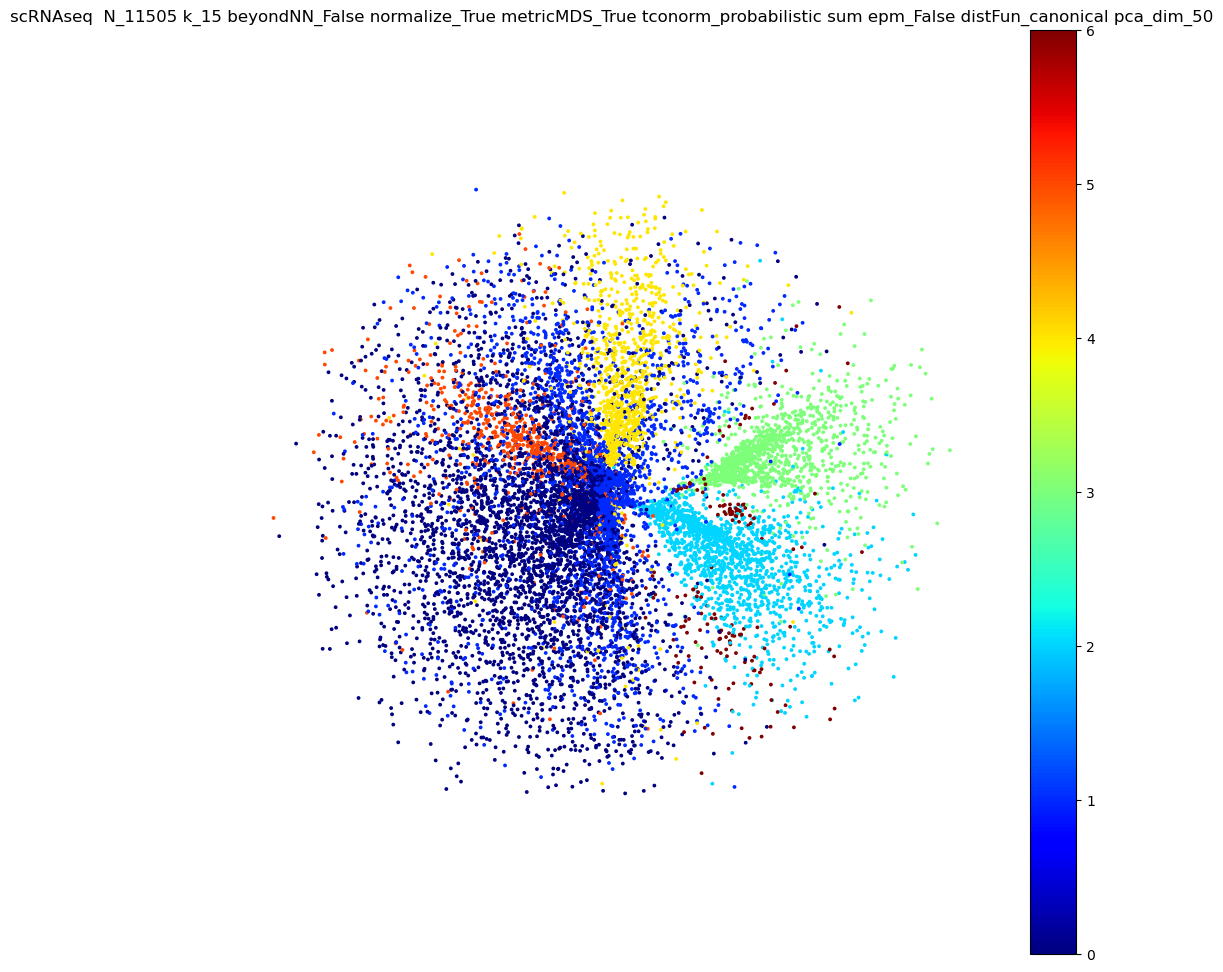

In [14]:
plot_data(new_embedding,labels,title=title,display=True, save=False, colorbar=True, path=path)

2025-05-06 21:46:39.221585: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 21:46:39.247235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/luke/miniconda3/envs/isumap/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


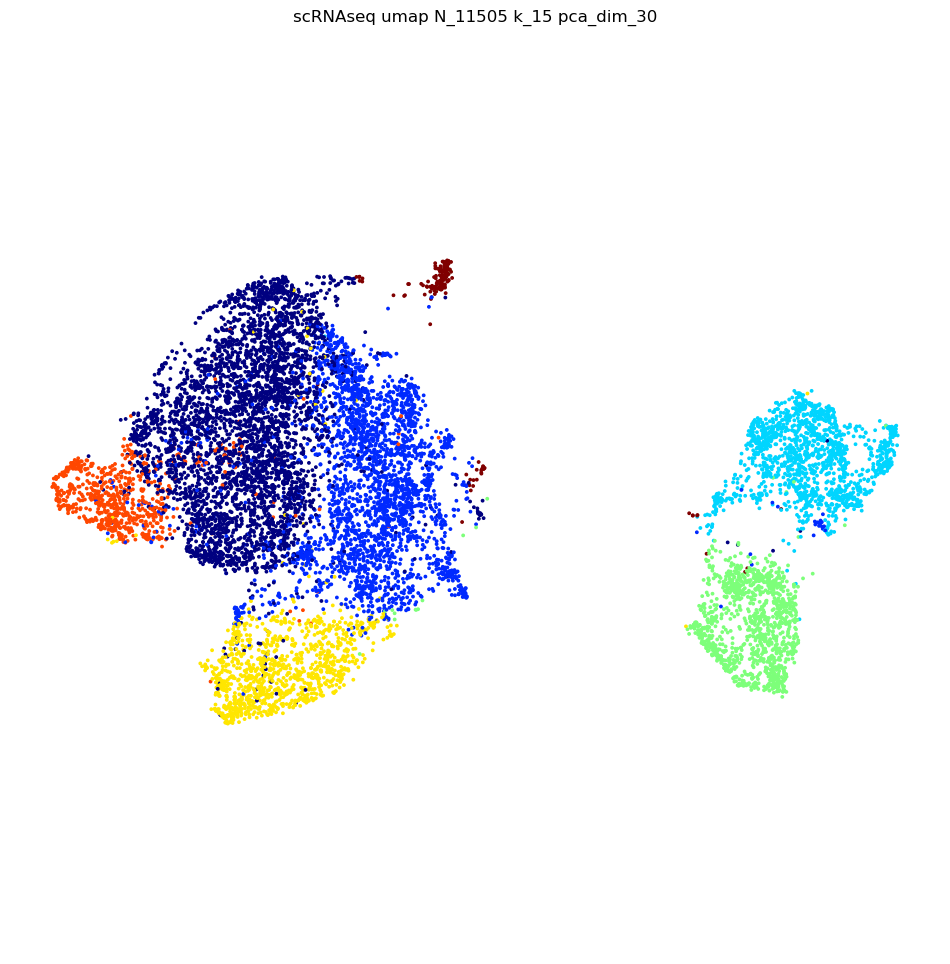

In [12]:
import umap

t0=time()
umap_embedding = umap.UMAP(random_state=42, n_neighbors = k).fit_transform(data)
t1 = time()

umap_title = "scRNAseq umap N_" + str(N) + " k_" + str(k) + " pca_dim_" + str(pca_dim)
plot_data(umap_embedding,labels, title = umap_title, display = True, save=True, path=path)